# Can a small LLM truly understand misconceptions?
### This notebook is intended to help quantify how well (if at all) small LLMs can identify misconceptions.

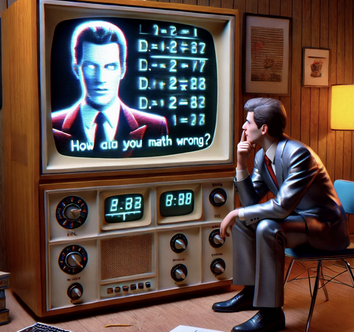

## This version is evaluating: Qwen2.5-7b-math-instruct
* 3 example questions
* Using vLLM

* Scroll to the bottom to see the score!

## Previously tested:
| Model |  GPU / Config  | Examples | Fraction Correct | Total Notebook Runtime | Link |
|-------|-----|---------|---------------------|------|-----|
| Qwen2.5-Math-7B-Instruct | T4x2 / vLLM | 3 | 0.4575 | 485 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=203806768) |
| Qwen2.5-32B-Instruct-AWQ | T4x2 / vLLM | 16 | 0.68 | 2684 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=202051558) |
| Qwen2.5-32B-Instruct-AWQ | T4x2 / vLLM | 8 | 0.6375 | 1796 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=201999409) |
| Qwen2.5-32B-Instruct-AWQ | T4x2 / vLLM | 6 | 0.6525 | 1710 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=202050449) |
| Qwen2.5-32B-Instruct-AWQ | T4x2 / vLLM | 3 | 0.5975 | 1340 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=201994345) |
| Phi 3.0 Medium | T4x2 / (no quant. / **float16**) | 3 | 0.5475 | 1071 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200911985) |
| Phi 3.0 Medium | T4x2 / (no quant. / bfloat16) | 3 | 0.5775 | 4182 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200894982) |
| Phi 3.0 Medium | T4x2 / (8-bit quant. / **float16**) | 6 | 0.525 | 1608 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200736632) |
| Phi 3.0 Medium | T4x2 / (8-bit quant. / **float16**) | 3 | 0.5525 | 1245 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200736507) |
| Phi 3.0 Medium | T4x2 / (4-bit quant. / bfloat16) | 3 | 0.48 | 3997 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200692771) |
| Phi-3.5-MoE | T4x2 / (4-bit quant. / bfloat16) | 3 | 0.4975 | 3946 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200650232) |
| DeepSeek 7b | P100 / (no quant. / bfloat16) | 3 | 0.384 | 927 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200267548) |
| Phi-Mini 3.5 (3.8B) | P100 / (no quant. / bfloat16) | 1 | 0.4975 | 548 seconds* | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200265282) |
| Phi-Mini 3.5 (3.8B) | P100 / (no quant. / **float16**) | 3 | 0.5075 | 760 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200915015) |
| Phi-Mini 3.5 (3.8B) | P100 / (no quant. / bfloat16) | 3 | 0.53 | 798 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200235649) |
| Phi-Mini 3.5 (3.8B) | P100 / (no quant. / bfloat16) | 6 | 0.5075 | 1053 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=199968053) |
| Phi-Mini 3.5 (3.8B) | P100 / (no quant. / bfloat16) | 10 | 0.48 | 1543 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200110898) |
| Mistral 7B v0.2 | P100 / (no quant. / bfloat16) | 6 | 0.36 | 1850 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=199986968)  |
| Gemma-2-2b Instruct | P100 / (no quant. / bfloat16) | 6 | 0.385 | 757 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200109022)  |
| Llama 3.1 8b instruct | P100 / (no quant. / bfloat16) | 6 | 0.4975 | 3167 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200126901)  |
| Llama 3.2 3b instruct | P100 / (no quant. / bfloat16) | 6 | 0.41 | 753 seconds | [Notebook](https://www.kaggle.com/code/richolson/eedi-llm-benchmark?scriptVersionId=200205223)  |
* "*" indicatates max_new_tokens reduced from 20 to 10 (fewer examples causing models to ramble after answer)
* Runtimes are for full notebook / include model load.

Earlier, I made a notebook for this competition using Phi-Mini:
### https://www.kaggle.com/code/richolson/eedi-phi-mini-3-5

But I got thinking - how do I know if Phi is actually understanding anything? Maybe it's just spitting out statistical word-salad that happens to be right-enough to produce a decent LB score?

This notebook is my attempt to figure out if Phi (or other small LLMs) really understand misconceptions - or if they're just faking it...

## Approach: Make a multiple-choice test for the LLM
* We'll provide the LLM with a question (from train), the correct answer and a randomly chosen wrong answer
* We will then ask the LLM to identify the misconception for the wrong answer out of all the misconceptions for that question (labeled 1-3)
* If the LLM has no understanding, it should perform at around 33%

To simplify, we’ll limit the options to questions with unique answers: three different misconceptions and one correct answer (about 50% of the training data).

Additionally - we will "prime" the LLM with a list of example questions / misconceptions.  This will help the LLM understand the task - and also assure it responds in a usable format.

For this version - each tested question will have a random set of example questions (not tuned for that specific question).

Idea: Doing some intelligent selection of the example questions (matching subject / construct) - and/or adjusting the number of example questions might be interesting experiments.

Note: This notebook includes many multi-gigabyte LLMs (some of which require license agreements to use).  You may want to delete models you aren't interested in to speed up initial loading.

* Thanks to Abdullah Meda and Chris Deotte for their work with vLLM:
* https://www.kaggle.com/code/abdullahmeda/eedi-few-shot-w-qwen2-5-32b-instruct-awq-vllm
* https://www.kaggle.com/code/cdeotte/infer-34b-with-vllm

# Usual imports

In [ ]:
import sys 
import torch
import random
import numpy as np
import pandas as pd
import time
import os
import logging
    
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Configure our LLM!
### Just uncomment the section for the LLM you want.
### NOTE: IF SWITCHING BETWEEN vLLM AND TRANSFORMERS DO A FULL STOP / START OF YOUR SESSION (restart is not adequate)
* These models tested on P100 unless noted

In [ ]:
#these are all default values - uncommenting the section for a specific LLM will define correctly for it
enable_4bit_quant = False      #4bit quantization (only effects transformers models)
enable_8bit_quant = False      #8bit quantization (only effects transformers models)
using_vllm = False             #model is loaded with vLLM (instead of transformers)

#torch_dtype (only effects non-VLLM models)
#bfloat16 produces better scores - but has large (3x) performance penalty on T4x2
#bfloat16 has less penalty on P100 (more like 20%)
#torch_dtype = torch.float16
torch_dtype = torch.bfloat16

##-----Qwen2.5-7b-math-instruct-----
model_name = '/kaggle/input/qwen7bmath'
using_vllm = True
vllm_temperature = 0.3

##-----DeepSeek 7b RL-----
#model_name = '/kaggle/input/deepseek-aideepseek-math-7b-rl/models--deepseek-ai--deepseek-math-7b-rl'

##-----Phi 3.5 mini-----
#model_name = '/kaggle/input/phi-3.5-mini-instruct/pytorch/default/1'

##-----Mistral 7b-----
#model_name = '/kaggle/input/mistral-7b-instruct-v0-2'

##-----Gemma 2b Instruct-----
#model_name = '/kaggle/input/gemma-2/transformers/gemma-2-2b-it/2'

##-----Llama 3.2 8b-----
#model_name = '/kaggle/input/llama-3.1/transformers/8b-instruct/2'

##-----Llama 3.1 3b-----
#model_name = '/kaggle/input/llama-3.2/transformers/3b-instruct/1'

##-----Phi-3.5-MoE-instruct-----
## MUST enable 4-bit quantization!
## Must be run on T4x2!
#model_name = '/kaggle/input/phi-3-5-moe-instruct/Phi-3.5-MoE-instruct'
#enable_4bit_quant = True

##-----Phi-3-Medium-4K-Instruct-----
##Onlytested on T4x2 - can run without quantization! 
##See https://www.kaggle.com/code/richolson/phi-3-medium-4k-instruct-offline-demo for additional config info
#model_name = '/kaggle/input/phi-3-medium-4k-instruct/transformers/default/1'

#-----Qwen2.5-32B-Instruct-AWQ!!!-----
## (requires vLLM and T4x2)
## Abdullah Meda: https://www.kaggle.com/code/abdullahmeda/eedi-few-shot-w-qwen2-5-32b-instruct-awq-vllm
## Chris Deotte: https://www.kaggle.com/code/cdeotte/infer-34b-with-vllm
#model_name  = '/kaggle/input/qwen2.5/transformers/32b-instruct-awq/1'
#using_vllm = True
#vllm_temperature = 1.0

# Borrow some whl files to run our LLM with internet off

In [ ]:
if not using_vllm:
    !pip install -q -U transformers --no-index --find-links /kaggle/input/hf-libraries/transformers
    !pip install -q -U accelerate --no-index --find-links /kaggle/input/hf-libraries/accelerate
    !pip install -q -U bitsandbytes --no-index --find-links /kaggle/input/hf-libraries/bitsandbytes
    
    #the below are only required for Phi-3.5-MoE and Phi-3-Medium (associated datasets can be removed if not using)
    !pip install -q -U einops --no-index --find-links /kaggle/input/einops-0-8-0-py3-none-any/einops-0.8.0-py3-none-any.whl
    !pip install -q -U triton --no-index --find-links /kaggle/input/triton-3-0-0/triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl
    !pip install -q -U flash-attn --no-index --find-links /kaggle/input/flash-attn-2-6-3-cp310-cp310-linux-x86-64-whl/flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl

# Conditional Imports
* If we are using vLLM vs Transformers need some different things...

In [ ]:
if using_vllm:
    from vllm import LLM, SamplingParams
    from transformers import AutoTokenizer, AutoModel
    os.environ["CUDA_VISIBLE_DEVICES"]   = "0,1"
    os.environ["TOKENIZERS_PARALLELISM"] = "false"
   
    import multiprocessing
    multiprocessing.set_start_method('spawn', force=True)

    
if not using_vllm:
    from transformers import pipeline, AutoModelForCausalLM, BitsAndBytesConfig, AutoConfig, AutoTokenizer, AutoModel
    logging.getLogger('transformers').setLevel(logging.ERROR)

# A few configuration things...

In [ ]:
random_seed = 42
random.seed(random_seed)

#all LLM responses start with this...
response_start = "The student had misconception "  #...(completed with the misconception number)

#maximum new tokens to generate for responses (we just need it to complete the above...)
max_new_tokens = 10

#number of questions to evaluate for test
questions_for_accuracy_test = 400

#randomly pick this many questions from the pool as example for each question
#new random example questions generated for each test question
example_questions_per_prompt = 6

# Load LLM (non vLLM)
* Re-running this may cause memory isseus (do "Run / Restart & clear cell outputs")
* get_response_for_messages() uses pipe to return response from LLM

In [ ]:
if not using_vllm:
    
    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    #just initialization these for if we haven't specific quantification
    quantization_config = None
    
    if enable_4bit_quant:
        quantization_config = BitsAndBytesConfig(
            load_in_4bit= True,
            bnb_4bit_quant_type= "nf4",
            bnb_4bit_compute_dtype= torch_dtype,
            bnb_4bit_use_double_quant=True,
        )
    
    if enable_8bit_quant:
        quantization_config = BitsAndBytesConfig(
            load_in_8bit=True,
            llm_int8_threshold=6.0,
            llm_int8_has_fp16_weight=False
        )    
        
    # Load model
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        torch_dtype=torch_dtype,
        quantization_config=quantization_config,
        device_map="auto",
        trust_remote_code=True
    )
        
    # Create pipeline
    pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, trust_remote_code=True, max_new_tokens=max_new_tokens)

    #returns message response for transformers-based models
    def get_response_for_messages(messages):
        response = pipe(messages)        
        return response[0]['generated_text'][-1]['content']

# Load LLM (using vLLM)
* Re-running this may cause memory isseus (do "Run / Restart & clear cell outputs")
* get_response_for_messages() uses llm.chat to return response from LLM

In [ ]:
sampling_params = SamplingParams(
    seed=1,                   # Seed for reprodicibility
    skip_special_tokens=True, # Whether to skip special tokens in the output.
    max_tokens=max_new_tokens,    # Maximum number of tokens to generate per output sequence.
    stop=['\n\n', '. '],      # List of strings that stop the generation when they are generated.
)

print 

In [ ]:
if using_vllm:
    
    llm = LLM(
        model_name,
        trust_remote_code=True,
        dtype="half", max_model_len=4096,
        tensor_parallel_size=2, gpu_memory_utilization=0.95, 
    )
    tokenizer = llm.get_tokenizer()
    
    sampling_params = SamplingParams(
        temperature=vllm_temperature,  
        seed=1,                   # Seed for reprodicibility
        skip_special_tokens=True, # Whether to skip special tokens in the output.
        max_tokens=max_new_tokens,    # Maximum number of tokens to generate per output sequence.
        stop=['\n\n', '. '],      # List of strings that stop the generation when they are generated.
    )

    #returns message response for vLLM-based models
    def get_response_for_messages(messages):
        return llm.chat(messages, sampling_params, use_tqdm=False)[0].outputs[0].text

# Test out our LLM

In [ ]:
messages = [
    {"role": "user", "content": "Tell me about yourself."},
]

get_response_for_messages(messages)

# Define our test_df (questions to evaluate) as a subset of train.csv
* Down-selecting to just questions with unique answers (this cuts the dataset down to just 524 questions)
* Randomly pick the number of desired questions from that

In [ ]:
train_df = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv")

#remove any rows that have duplicate misconceptions
#note: this reduces the dataset to just 524 questions
misconception_columns = ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']
duplicate_mask = (train_df[misconception_columns].nunique(axis=1) != train_df[misconception_columns].notna().sum(axis=1)) | (train_df[misconception_columns].isna().sum(axis=1) > 1)
train_df = train_df[~duplicate_mask]

#randomly pick subset of remaining test for actual questions
test_df = train_df.sample(n=questions_for_accuracy_test, random_state=random_seed)

print(f"Test set size: {len(test_df)}")

# Load misconception map

In [ ]:
misc_map_df = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv")

# Some utility functions...

In [ ]:
def get_just_answer_letter(my_string, response_start):
    # Trim leading and trailing spaces
    my_string = my_string.strip()
    
    # Remove response_start if present
    if my_string.startswith(response_start):
        my_string = my_string[len(response_start):]
            
    # Just first letter
    if len(my_string) > 0:
        my_string = my_string[0]
    
    return my_string

def get_misconception_name(misconception_id):
    if pd.isna(misconception_id):
        return "Answer is correct."
    try:
        return misc_map_df[misc_map_df['MisconceptionId'] == int(misconception_id)]['MisconceptionName'].values[0]
    except IndexError:
        return f"Unknown misconception (ID: {misconception_id})"

# Function to generate a list of questions for examples
* Randomly choose number of examples defined by example_questions_per_prompt
* Question being tested is excluded

In [ ]:
def get_example_df(question_under_test, example_questions_per_prompt):
    # Filter out the questions under test
    available_questions = test_df[~test_df['QuestionId'].isin(question_under_test)]
    
    # If we have fewer available questions than requested, use all available
    num_examples = min(example_questions_per_prompt, len(available_questions))
    
    # Randomly select the specified number of examples
    selected_examples = available_questions.sample(n=num_examples)
    
    return selected_examples    

# Function to generate LLM messages / send to LLM
* Takes input of just the question to be evaluated
* Creates example messages - showing correct prediction of misconception
* Creates final messsage with test question - asking LLM to predict which misconception matches provided wrong answer

In [ ]:
def predict_answer(question, verbose=False):
    
    def prompt_for_misconception(question):
        # Generate the question text
        question_text = f"{question['ConstructName']}: \n {question['QuestionText']}\n"

        # Pick a random incorrect answer
        correct_answer = question['CorrectAnswer']
        possible_answers = ["A", "B", "C", "D"]
        possible_answers.remove(correct_answer)

        #pick random based on index
        misconception_answer_index = random.randint(0,len(possible_answers)-1)

        question_text += f"\nCorrect answer: {question[f'Answer{correct_answer}Text']}"
        question_text += f"\nStudent's wrong answer: {question[f'Answer{possible_answers[misconception_answer_index]}Text']}"
        question_text += "What misconception did the student have?\n"

        for answer_index in range(len(possible_answers)):
            misconception_id = question[f'Misconception{possible_answers[answer_index]}Id']
            misconception_text= get_misconception_name(misconception_id)
            question_text += f" {answer_index + 1}: {misconception_text}\n"

        return question_text, misconception_answer_index
        
    example_messages = []
    
    example_df = get_example_df(question, example_questions_per_prompt)
    
    for question_index in range(len(example_df)):
        example_question = example_df.iloc[question_index]
        example_question_text, misconception_answer_index = prompt_for_misconception(example_question)

        example_set = [
            {"role": "user", "content": f"{example_question_text}"},
            {"role": "assistant", "content": f"{response_start}{misconception_answer_index + 1}"}
        ]
        example_messages = example_messages + example_set
        
        if verbose == True:
            print(example_set, "\n")
        
    actual_question_text, misconception_answer_index = prompt_for_misconception(question)
    
    actual_prompt_messages = [
            {"role": "user", "content": f"{actual_question_text}"},
    ]
    
    if verbose == True:
        print("\n----Actual Question----")
        print(actual_prompt_messages, "\n")
    
    messages = example_messages + actual_prompt_messages
    
    response = get_response_for_messages(messages)
    
    return response, str(misconception_answer_index + 1)

# Hard coded test of everything...

In [ ]:
start_time = time.time()

question_to_eval = 12
question = test_df.iloc[question_to_eval]

full_response, actual_misconception_answer_letter = predict_answer(question, verbose = True)
print("Full response:", full_response)
predicted_misconception_answer_letter = get_just_answer_letter(full_response, response_start)

print ("Predicted Answer: ", predicted_misconception_answer_letter)
print ("Actual answer: ", actual_misconception_answer_letter)

if actual_misconception_answer_letter == predicted_misconception_answer_letter:
    print("Correct!")
else:
    print("Wrong!")

end_time = time.time()
print(end_time - start_time, " seconds")

# Predict Misconceptions for all Questions
* Should score 33% (1 out of 3) if the LLM doesn't understand anything...
* +/- indicates a correct / incorrect result for a given question
* "?" indicates the answer was not 1, 2 or 3 (scored as incorrect)

In [ ]:
correct = 0
incorrect = 0
unknown = 0
start_time = time.time()

bad_responses = []
for question_index in range(len(test_df)):
    question_start_time = time.time()
    test_question = test_df.iloc[question_index]
    full_response, actual_misconception_answer_letter = predict_answer(test_question, verbose=False)
    predicted_misconception_answer_letter = get_just_answer_letter(full_response, response_start)

    if predicted_misconception_answer_letter not in ['1', '2', '3']:
        bad_responses.append(full_response)
        unknown += 1
        print("?", end="")
    elif actual_misconception_answer_letter == predicted_misconception_answer_letter:
        correct += 1
        print("+", end="")
    else:
        incorrect += 1
        print("-", end="")
    
end_time = time.time()
total_time = end_time - start_time
total_questions = correct + incorrect + unknown

print("\nCorrect:", correct)
print("Incorrect:", incorrect)
print("Unknown ('?'):", unknown)
print("Fraction Correct:", correct / total_questions)
print("Total Time:", f"{total_time:.2f} seconds")
print("Average Time per Question:", f"{total_time / total_questions:.2f} seconds")

print("\nBad Responses (Unknown):")
for bad_response in bad_responses:
    print(bad_response)